In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder = 'E:/GZ-DESI/data'

In [3]:
df_int = pd.read_parquet(f'{folder}/2023-03-15-cats/definitive-merged-interesting-params.parquet', engine = 'pyarrow')

In [5]:
df_int.category.value_counts()

merger               185278
major_interaction     11594
minor_interaction       267
Name: category, dtype: int64

In [8]:
df_int.columns

Index(['id_str', 'merging_none_fraction', 'merging_minor-disturbance_fraction',
       'merging_major-disturbance_fraction', 'merging_merger_fraction',
       'category', 'ra', 'dec', 'log_l_ha', 'log_l_oiii', 'photo_z', 'spec_z',
       'redshift', 'redshift_nsa', 'total_sfr_avg', 'elpetro_mass', 'logMH',
       'elpetro_mass_log', 'log_m_bh', 'log_bolometric_l'],
      dtype='object')

In [12]:
df_red = df_int[['id_str', 'category', 'merging_none_fraction', 'merging_minor-disturbance_fraction', 'merging_major-disturbance_fraction', 'merging_merger_fraction']]

In [11]:
df_cas = pd.read_csv('C:/Users/oryan/Documents/galaxy-zoo-desi/results/gini-m20s-faster.csv', index_col = 0)

In [38]:
df_maj = (
    df_red
    .query('category == "major_interaction"')
)

In [39]:
df_cas_red = df_cas[['id_str', 'gini', 'm20']]

In [40]:
df_merg = df_maj.merge(df_cas_red, on = 'id_str', how = 'left')

Text(0, 0.5, 'Gini Coefficient')

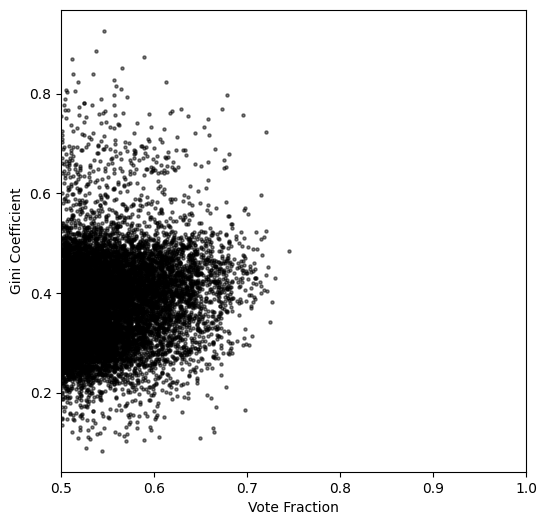

In [44]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'merging_major-disturbance_fraction',
    y = 'gini',
    s = 5,
    color = 'black',
    alpha = 0.5,
    figsize = (6,6),
    xlim = [0.5, 1],
    ax = ax1
)
ax1.set_xlabel('Vote Fraction')
ax1.set_ylabel('Gini Coefficient')